# Análisis de Datos

Este cuaderno se utiliza para la recolección y análisis de datos del sistema energético híbrido. Incluye la conexión a APIs para descargar datos de generación solar y eólica, así como la visualización de estos datos.

dict_keys(['type', 'geometry', 'properties', 'header', 'messages', 'parameters', 'times'])
dict_keys(['parameter'])
dict_keys(['ALLSKY_SFC_SW_DWN'])
Longitud de fechas: 113929
Longitud de irradiancia: 113952


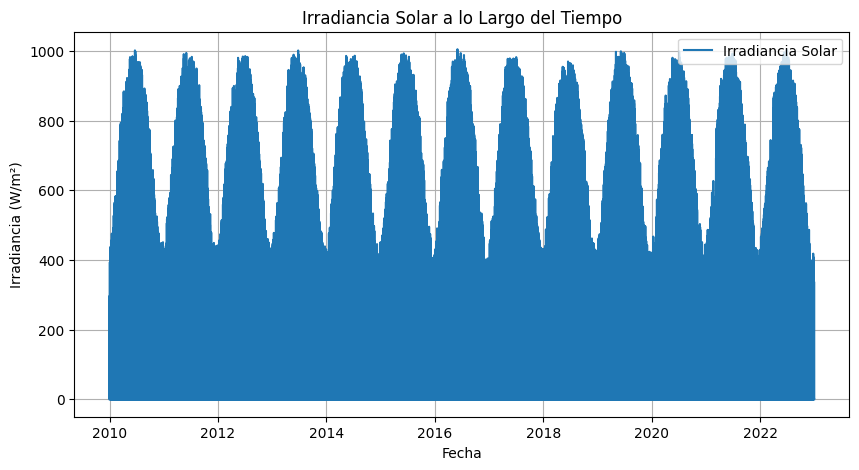

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np

# Función para obtener datos de la API de Power Nasa
def obtener_datos_nrel(api_url):
    response = requests.get(api_url)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception('Error al obtener datos de NREL')

# URL de ejemplo para obtener datos de irradiancia solar
url_irradiancia = 'https://power.larc.nasa.gov/api/temporal/hourly/point?start=20100101&end=20221231&latitude=41.66&longitude=-0.88&community=re&parameters=ALLSKY_SFC_SW_DWN&format=json&user=EnergeticHIbrid&header=true&time-standard=lst'

# Obtener datos de irradiancia
datos_irradiancia = obtener_datos_nrel(url_irradiancia)

# Inspeccionar la estructura de datos_irradiancia
print(datos_irradiancia.keys())
print(datos_irradiancia['properties'].keys())
print(datos_irradiancia['properties']['parameter'].keys())

# Extraer datos de irradiancia y fechas
irradiancia = datos_irradiancia['properties']['parameter']['ALLSKY_SFC_SW_DWN']
fechas = pd.date_range(start='2010-01-01', end='2022-12-31', freq='h')

# Convertir el diccionario de irradiancia a una lista ordenada por fecha
irradiancia = [irradiancia[key] for key in sorted(irradiancia.keys())]

# Verificar las longitudes de las listas
print(f"Longitud de fechas: {len(fechas)}")
print(f"Longitud de irradiancia: {len(irradiancia)}")

# Ajustar las longitudes de las listas para que coincidan
min_length = min(len(fechas), len(irradiancia))
fechas = fechas[:min_length]
irradiancia = irradiancia[:min_length]

# Crear DataFrame
df_irradiancia = pd.DataFrame({'fecha': fechas, 'irradiancia': irradiancia})

# Visualizar los datos
plt.figure(figsize=(10, 5))
plt.plot(df_irradiancia['fecha'], df_irradiancia['irradiancia'], label='Irradiancia Solar')
plt.title('Irradiancia Solar a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Irradiancia (W/m²)')
plt.legend()
plt.grid()
plt.show()

## Análisis de Datos de Generación Eólica

A continuación, se puede agregar el código para obtener y visualizar datos de generación eólica de una API similar.

dict_keys(['type', 'geometry', 'properties', 'header', 'messages', 'parameters', 'times'])
dict_keys(['parameter'])
dict_keys(['WS10M'])
Longitud de fechas: 113929
Longitud de velocidad_viento: 113952


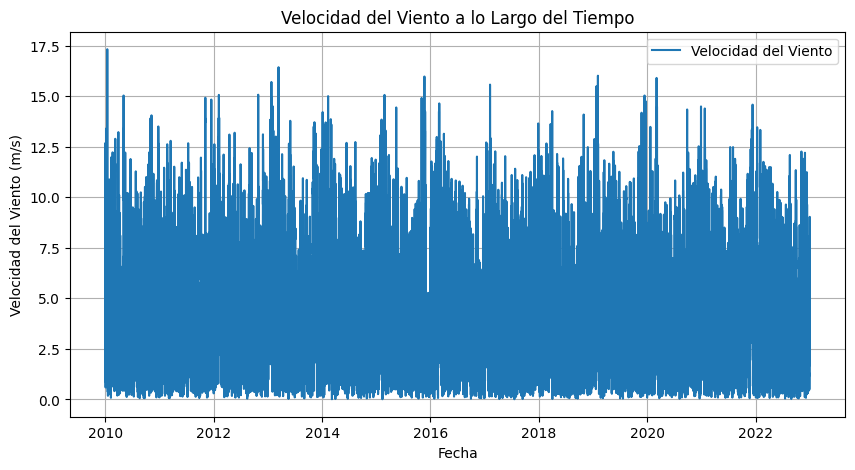

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np

# Función para obtener datos de la API de Power Nasa
def obtener_datos_nrel(api_url):
    response = requests.get(api_url)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception('Error al obtener datos de NREL')

# URL de ejemplo para obtener datos de velocidad del viento
url_viento = 'https://power.larc.nasa.gov/api/temporal/hourly/point?start=20100101&end=20221231&latitude=41.66&longitude=-0.88&community=re&parameters=WS10M&format=json&user=EnergeticHIbrid&header=true&time-standard=lst'

# Obtener datos de velocidad del viento
datos_viento = obtener_datos_nrel(url_viento)

# Inspeccionar la estructura de datos_viento
print(datos_viento.keys())
print(datos_viento['properties'].keys())
print(datos_viento['properties']['parameter'].keys())

# Extraer datos de velocidad del viento y fechas
velocidad_viento = datos_viento['properties']['parameter']['WS10M']
fechas = pd.date_range(start='2010-01-01', end='2022-12-31', freq='h')

# Convertir el diccionario de velocidad del viento a una lista ordenada por fecha
velocidad_viento = [velocidad_viento[key] for key in sorted(velocidad_viento.keys())]

# Verificar las longitudes de las listas
print(f"Longitud de fechas: {len(fechas)}")
print(f"Longitud de velocidad_viento: {len(velocidad_viento)}")

# Ajustar las longitudes de las listas para que coincidan
min_length = min(len(fechas), len(velocidad_viento))
fechas = fechas[:min_length]
velocidad_viento = velocidad_viento[:min_length]

# Crear DataFrame
df_viento = pd.DataFrame({'fecha': fechas, 'velocidad_viento': velocidad_viento})

# Visualizar los datos
plt.figure(figsize=(10, 5))
plt.plot(df_viento['fecha'], df_viento['velocidad_viento'], label='Velocidad del Viento')
plt.title('Velocidad del Viento a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Velocidad del Viento (m/s)')
plt.legend()
plt.grid()
plt.show()